In [19]:
import numpy as np
import matplotlib.pyplot as plt  
from scipy import stats
import seaborn as sbn

In [20]:
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=60)
print (faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


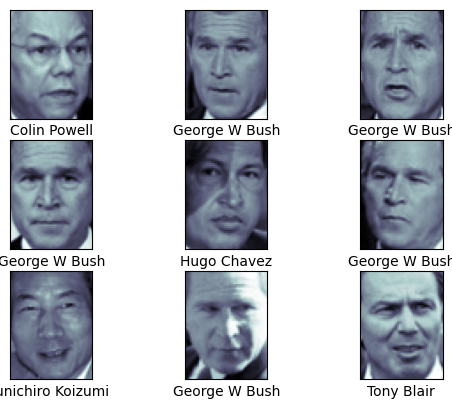

In [21]:
fig, ax=plt.subplots(3,3)
for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap='bone')
  axi.set(xticks=[],yticks=[], xlabel=faces.target_names[faces.target[i]])    

Chaque image contient [62 x 47], soit 3000 pixels.aque  Nous pouvons procéder en utilisant la valeur de chaque pixel comme feature mais il est souvent plus efficace d'utiliser un prétraitement pour extraire des features plus significatifs et réduits en dimension.
Ici, nous utiliserons une **analyse en composantes principales** pour extraire 150 composantes principales qui alimenteront notre SVM. nous pouvons le faire simplement en regroupant le préprocesseur et le classifieur dans un seul pipeline

In [22]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

PCA=RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc=SVC(kernel='rbf',class_weight='balance')
model=make_pipeline(PCA,svc)

In [23]:
#diviser les données en données d'entrainement et de test en utilisant train_test_split de sklearn


Nous pouvons utiliser une validation croisée( grid search cross validation) pour explorer 
des combinaisons d'hyperparamètres.
Dans cet exemple, nous ajusterons le paramètre de régularisation C  (qui contrôle la dureté de la marge) et le paramètre gamma (qui contrôle la taille du noyau de la fonction radiale) pour déterminer le meilleur modèle0

In [24]:
#model=grid.best_estimator_
#yfit=model(X_test)

évaluer le résultat en utilisant les métriques de sklearn